In [7]:
import numpy as np

import heapq

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure


In [8]:
# plot grid
grid = np.array([

    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0],

    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],

    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],

    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])



In [9]:
# start point and goal

start = (0,0)

goal = (0,19)


# heuristic function for path scoring

def heuristic(a, b):

    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

 

In [10]:
# path finding function

def astar(array, start, goal):

    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]

    close_set = set()

    came_from = {}

    gscore = {start:0}

    fscore = {start:heuristic(start, goal)}

    oheap = []

    heapq.heappush(oheap, (fscore[start], start))
 

    while oheap:

        current = heapq.heappop(oheap)[1]

        if current == goal:

            data = []

            while current in came_from:

                data.append(current)

                current = came_from[current]

            return data

        close_set.add(current)

        for i, j in neighbors:

            neighbor = current[0] + i, current[1] + j

            tentative_g_score = gscore[current] + heuristic(current, neighbor)

            if 0 <= neighbor[0] < array.shape[0]:

                if 0 <= neighbor[1] < array.shape[1]:                

                    if array[neighbor[0]][neighbor[1]] == 1:

                        continue

                else:

                    # array bound y walls

                    continue

            else:

                # array bound x walls

                continue
 

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):

                continue
 

            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:

                came_from[neighbor] = current

                gscore[neighbor] = tentative_g_score

                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)

                heapq.heappush(oheap, (fscore[neighbor], neighbor))
 

    return False

route = astar(grid, start, goal)

route = route + [start]

route = route[::-1]

print(route)


[(0, 0), (1, 1), (2, 1), (3, 2), (4, 2), (5, 2), (6, 3), (7, 4), (8, 5), (9, 5), (10, 5), (11, 5), (12, 4), (13, 3), (14, 2), (15, 1), (16, 1), (17, 1), (18, 2), (18, 3), (18, 4), (18, 5), (18, 6), (18, 7), (18, 8), (18, 9), (18, 10), (18, 11), (18, 12), (17, 13), (16, 14), (15, 14), (14, 14), (13, 13), (13, 12), (13, 11), (12, 10), (11, 11), (10, 12), (10, 13), (9, 14), (9, 15), (8, 16), (7, 17), (6, 18), (5, 18), (4, 18), (3, 18), (2, 18), (1, 18), (0, 19)]


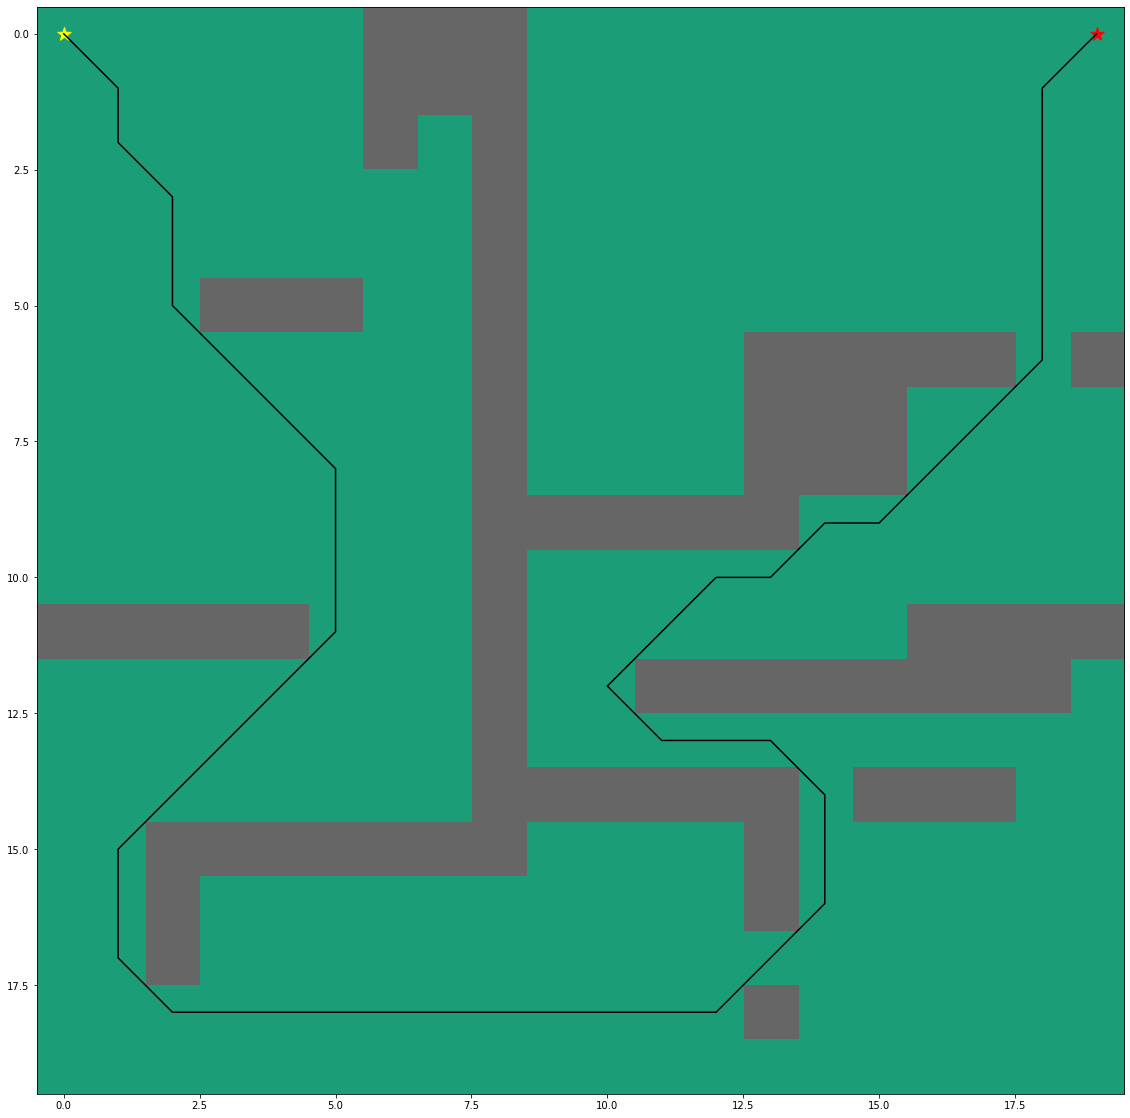

In [11]:
# plot the path

#extract x and y coordinates from route list

x_coords = []

y_coords = []

for i in (range(0,len(route))):

    x = route[i][0]

    y = route[i][1]

    x_coords.append(x)

    y_coords.append(y)

# plot map and path

fig, ax = plt.subplots(figsize=(20,20))

ax.imshow(grid, cmap=plt.cm.Dark2)

ax.scatter(start[1],start[0], marker = "*", color = "yellow", s = 200)

ax.scatter(goal[1],goal[0], marker = "*", color = "red", s = 200)

ax.plot(y_coords,x_coords, color = "black")

plt.show()
